In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("Historical Product Demand.csv")

In [3]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [4]:
df.dropna()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [5]:
df.drop(["Date"], axis = 1, inplace = True)

In [6]:
df['Order_Demand'] = df['Order_Demand'].str.replace(' ', '')
df['Order_Demand'] = df['Order_Demand'].str.replace(r'\D+', '', regex=True)
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'], errors='coerce').astype('Int64')

In [7]:
df["Order_Demand"][0]

100

In [8]:
from sklearn.preprocessing import LabelEncoder
df["Product_Category"] = LabelEncoder().fit_transform(df["Product_Category"])
df["Product_Code"] = LabelEncoder().fit_transform(df["Product_Code"])
df["Warehouse"] = LabelEncoder().fit_transform(df["Warehouse"])
df

,Product_Code,Warehouse,Product_Category,Order_Demand
0,982,2,27,100
1,968,2,27,500
2,968,2,27,500
3,968,2,27,500
4,968,2,27,500
...,...,...,...,...
1048570,1780,2,5,1000
1048571,1962,2,5,1
1048572,1776,2,5,2500
1048573,890,2,22,50


In [9]:
features = len(df.columns)
y = df.iloc[:, -1].values
X = df.iloc[:, 0:3].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 8).fit(X_train, y_train)
model.score(X_test, y_test)

0.22155558691415256

In [13]:
scores = []
results = 0
best_score = 0
neighbors = range(1,10)

for i in neighbors:
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    scores.append(round(results,2))
    
    if results > best_score:
        best_score = results
        best_k = i 
        bestmodel = knn
print(scores)
print(best_k)

[-0.04, -0.03, 0.12, 0.19, 0.16, 0.19, 0.2, 0.22, 0.22]
9


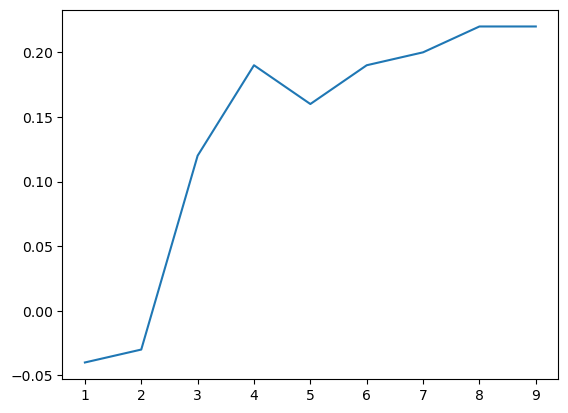

In [14]:
import matplotlib.pyplot as plt
plt.plot(neighbors, scores)

In [15]:
accuracy = bestmodel.score(X_validate, y_validate)
print("The best model has an accuracy of:", round(accuracy, 2))

The best model has an accuracy of: 0.17


In [ ]:
#SVMs
from sklearn.svm import SVR
modelSVR = SVR(C=1.0, kernel='rbf',gamma='auto').fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)
score = modelSVR.score(X_test, y_test)
print(score)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test,y_pred)))